# Set Matrix Zeroes

**Problem**:
Given an `m x n` integer matrix, if an element is 0, set its entire row and column to 0's. The modification should be done in place.

**Examples**:

1. **Input**:
   `matrix = [[1,1,1],[1,0,1],[1,1,1]]`
   
   **Output**: `[[1,0,1],[0,0,0],[1,0,1]]`
   
   **Explanation**:
   After finding a 0 in the second row, the entire second row and second column are set to 0.

   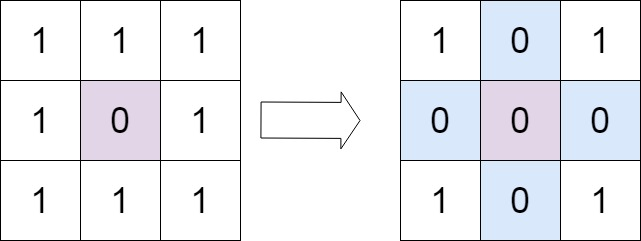

2. **Input**:
   `matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]`
   
   **Output**: `[[0,0,0,0],[0,4,5,0],[0,3,1,0]]`
   
   **Explanation**:
   The first and fourth columns are set to 0 because of the zeros in the first row.

**Constraints**:
- `m == matrix.length`
- `n == matrix[i].length`
- `1 <= m, n <= 200`
- `-2^31 <= matrix[i][j] <= 2^31 - 1`

### **Follow up**:
- A straightforward solution using O(mn) space is probably a bad idea.
- A simple improvement uses O(m + n) space, but still not the best solution.
- Can you devise a constant space solution?


In [1]:
from typing import List

def test(s: object):
    test_cases = [
        ([[1,1,1],[1,0,1],[1,1,1]], [[1,0,1],[0,0,0],[1,0,1]]),
        ([[0,1,2,0],[3,4,5,2],[1,3,1,5]], [[0,0,0,0],[0,4,5,0],[0,3,1,0]])
    ]
    for matrix, expected in test_cases:
        s.setZeroes(matrix)
        assert matrix == expected, f"wrong result for matrix = {matrix}, expected = {expected}"
    print("Succeed")


In [2]:
'''
This is using O(m+n) extra space.
'''

class Solution:
    def setZeroes(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        m, n = len(matrix), len(matrix[0])
        row = [0 for i in range(m)]
        col = [0 for i in range(n)]

        for i in range(m):
            for j in range(n):
                if matrix[i][j] == 0:
                    row[i] = 1
                    col[j] = 1

        # set rows zeroes
        for i in range(m):
            if row[i] == 1:
                for j in range(n):
                    matrix[i][j] = 0
                    
        # set cols zeroes
        for i in range(n):
            if col[i] == 1:
                for j in range(m):
                    matrix[j][i] = 0


test(Solution())

Succeed


In [ ]:
'''
Follow up, use O(1) extra space.

The core idea here is to use the first row and the first col to record whether
there is a zero in this row/col, serving as a flag.

Why this works: if [i,j] is 0, then [i,0] and [0,j] <has to be 0 anyway> !
This is really clever
'''

class Solution:
    def setZeroes(self, matrix: List[List[int]]) -> None:
        row = len(matrix)
        col = len(matrix[0])

        # whether there is 0 in the first line or col
        row0_flag = False
        col0_flag = False

        for j in range(col):
            if matrix[0][j] == 0:
                row0_flag = True
                break
        for i in range(row):
            if matrix[i][0] == 0:
                col0_flag = True
                break

        for i in range(1, row):
            for j in range(1, col):
                if matrix[i][j] == 0:
                    matrix[i][0] = matrix[0][j] = 0
        for i in range(1, row):
            for j in range(1, col):
                if matrix[i][0] == 0 or matrix[0][j] == 0:
                    matrix[i][j] = 0

        if row0_flag:
            for j in range(col):
                matrix[0][j] = 0
        if col0_flag:
            for i in range(row):
                matrix[i][0] = 0